# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [1]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>,
        <Axes: xlabel='cluster_label', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
   

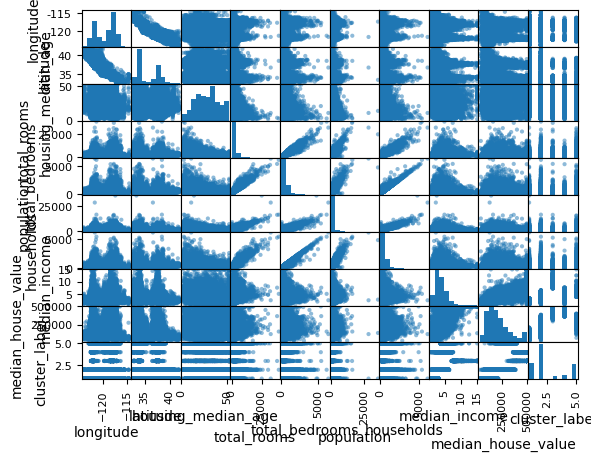

In [8]:
# delete column ocean_proximity
import copy as cp
df1 = cp.deepcopy(df)
df.drop('ocean_proximity', axis=1, inplace=True)
df.describe()
df.corr()
pd.plotting.scatter_matrix(df)



### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [ ]:
# Analyzing the distribution of categorical variables
categorical_vars = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']  # Replace with the actual variable names

for var in categorical_vars:
    print(f"Variable: {var}")
    print(df[var].value_counts())
    print("\n")

# Creating frequency diagrams
import matplotlib.pyplot as plt

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(f"Frequency Diagram - {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [10]:
from sklearn.preprocessing import StandardScaler

subset_cols = ['longitude','latitude','total_rooms','total_bedrooms','population','households']  # Replace with the actual variable names

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos: estandarización usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Convertir los datos preprocesados en un nuevo DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=subset_cols)

# Mostrar el nuevo DataFrame con los datos preprocesados
print(df_scaled.head())


   longitude  latitude  total_rooms  total_bedrooms  population  households
0  -1.327835  1.052548    -0.804819       -0.970325   -0.974429   -0.977033
1  -1.322844  1.043185     2.045890        1.348276    0.861439    1.669961
2  -1.332827  1.038503    -0.535746       -0.825561   -0.820777   -0.843637
3  -1.337818  1.038503    -0.624215       -0.718768   -0.766028   -0.733781
4  -1.337818  1.038503    -0.462404       -0.611974   -0.759847   -0.629157


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Definir el rango de número de clusters
k_range = range(2, 11)

# Lista para almacenar los resultados del índice davies_bouldin
db_scores = []

# Iterar sobre el rango de número de clusters
for k in k_range:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    
    # Calcular el índice davies_bouldin y almacenarlo en la lista
    db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
    db_scores.append(db_score)

# Encontrar el número óptimo de clusters con el índice más bajo
optimal_clusters = k_range[db_scores.index(min(db_scores))]
print("Número óptimo de clusters:", optimal_clusters)


Número óptimo de clusters: 2


## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

              longitude                                                  \
                  count        mean       std     min       25%     50%   
cluster_label                                                             
0                5732.0 -119.782605  2.018304 -123.17 -122.0325 -118.52   
1               14908.0 -119.487846  1.991843 -124.35 -121.4400 -118.47   

                              latitude             ... median_income           \
                  75%     max    count       mean  ...           75%      max   
cluster_label                                      ...                          
0             -118.07 -115.59   5732.0  35.426076  ...       6.70945  15.0001   
1             -117.98 -114.31  14908.0  35.710984  ...       3.80000   7.5752   

              median_house_value                                         \
                           count           mean           std       min   
cluster_label                                                       

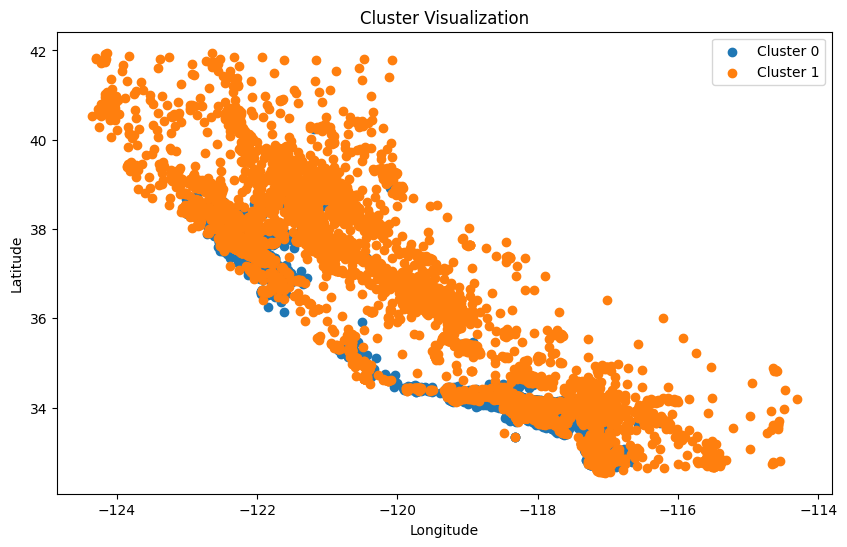

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['longitude', 'latitude', 'median_income', 'median_house_value']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos si es necesario
# En este caso, suponemos que los datos ya están escalados

# Inicializar y ajustar el modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_scaled)

# Asignar las etiquetas de clusters al conjunto de datos original
df['cluster_label'] = kmeans.labels_

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
print(cluster_stats)

# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



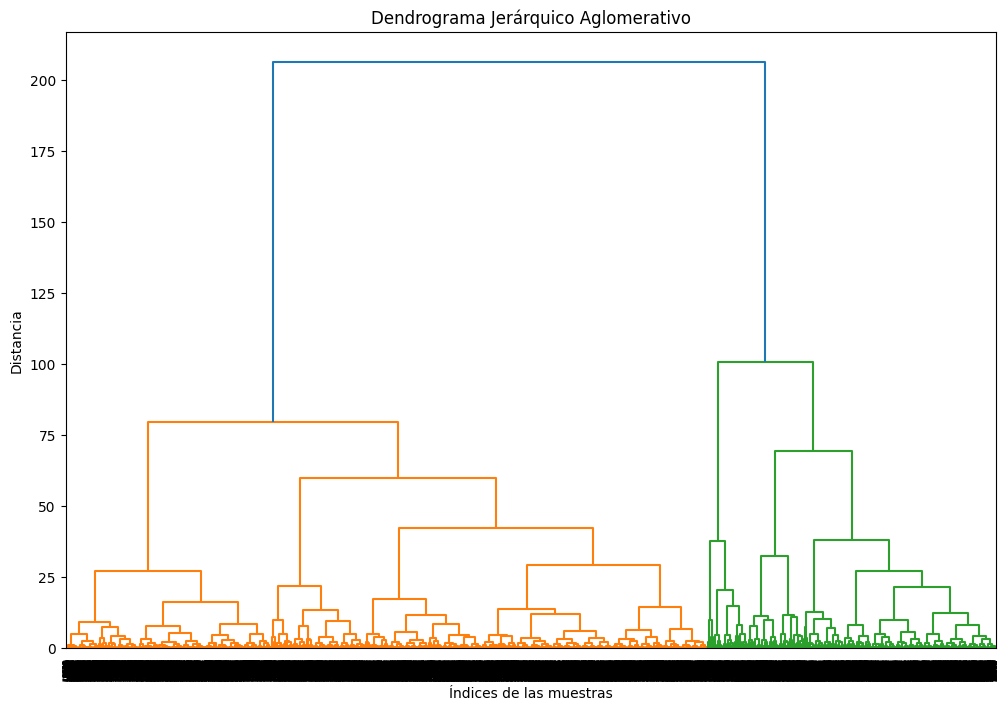

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['median_income', 'median_house_value']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos: estandarización usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Realizar clustering jerárquico aglomerativo
linkage_matrix = linkage(scaled_data, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico Aglomerativo')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()


              median_income                                                 \
                      count      mean       std     min       25%      50%   
cluster_label                                                                
1                    4559.0  1.977831  0.481564  0.4999  1.664950  2.01090   
2                    9698.0  3.469287  0.816438  0.5360  2.907775  3.38475   
3                     879.0  9.532151  2.037140  7.0691  8.010800  8.74770   
4                    1255.0  4.931877  1.445640  0.4999  3.782550  5.07310   
5                    4249.0  5.333093  0.986787  3.7500  4.575900  5.17520   

                                 median_house_value                 \
                    75%      max              count           mean   
cluster_label                                                        
1               2.30430   3.2197             4559.0   99325.772538   
2               3.93045   6.4753             9698.0  172860.239121   
3              10.44565  

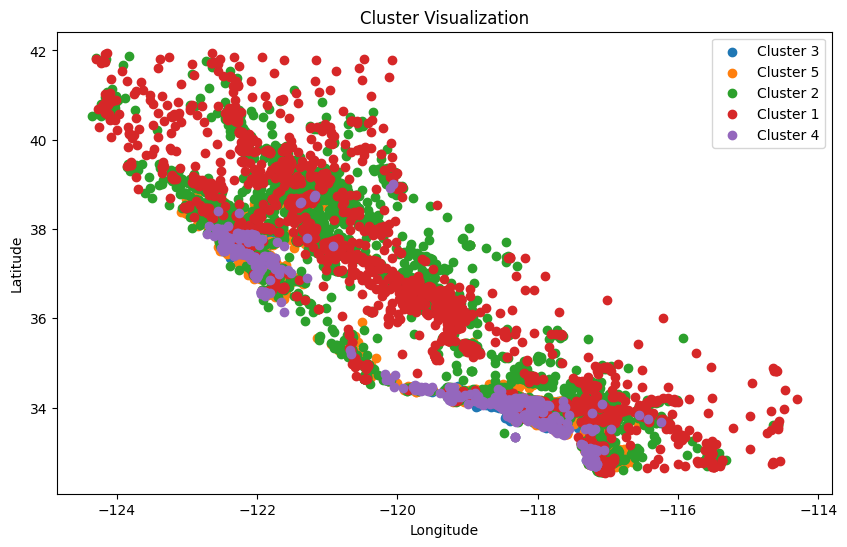

In [6]:
from scipy.cluster.hierarchy import fcluster

# Definir el número óptimo de clusters basado en el dendrograma
optimal_clusters = 5

# Obtener las etiquetas de cluster para cada muestra
cluster_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Agregar las etiquetas de cluster al dataframe original
df['cluster_label'] = cluster_labels

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
print(cluster_stats)

# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()
